<a href="https://colab.research.google.com/github/kavinm21/Sem_9/blob/main/SNDA/19PD18_SNDA_PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import gzip
import tarfile
import requests
import io
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
def draw(G, pos, measures, measure_name):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [ ]:
# r = requests.get('https://snap.stanford.edu/data/facebook_combined.txt.gz')
# f = io.BytesIO(r.content)
# with gzip.GzipFile(fileobj=f) as fh:
#     file = fh.readlines()
# # file = [x.decode("utf-8").replace('\n', '') for x in file]
# min_edges = 0
# max_edges = 10000

In [ ]:
r = requests.get('https://snap.stanford.edu/data/facebook.tar.gz')
stream = io.BytesIO(r.content)
files = tarfile.open(fileobj=stream)
files.extractall()
f = open("/content/facebook/0.edges").readlines()
print(f)

['236 186\n', '122 285\n', '24 346\n', '271 304\n', '176 9\n', '130 329\n', '204 213\n', '252 332\n', '82 65\n', '276 26\n', '280 272\n', '211 199\n', '84 236\n', '133 62\n', '239 172\n', '322 53\n', '3 170\n', '175 46\n', '170 176\n', '170 56\n', '254 194\n', '231 117\n', '127 135\n', '285 103\n', '188 133\n', '23 116\n', '73 299\n', '288 315\n', '119 323\n', '48 57\n', '200 98\n', '313 63\n', '199 304\n', '53 346\n', '344 239\n', '56 67\n', '118 325\n', '188 119\n', '26 277\n', '134 56\n', '270 76\n', '135 36\n', '223 170\n', '170 274\n', '88 21\n', '339 119\n', '108 197\n', '169 271\n', '62 236\n', '275 273\n', '88 186\n', '213 186\n', '83 23\n', '28 312\n', '242 57\n', '214 20\n', '307 71\n', '20 333\n', '207 322\n', '339 168\n', '308 277\n', '186 341\n', '322 122\n', '128 9\n', '334 252\n', '238 265\n', '67 141\n', '78 273\n', '345 122\n', '315 345\n', '317 158\n', '98 21\n', '339 38\n', '24 302\n', '27 54\n', '197 139\n', '109 118\n', '252 291\n', '170 142\n', '82 271\n', '203 33

In [ ]:
edges = [(int(x.split(' ')[0]), int(x.split(' ')[1])) for x in f]
#edges = [(int(x.split(' ')[0]), int(x.split(' ')[1])) for x in file]
#edges = edges[min_edges:max_edges]
print(len(edges))

5038


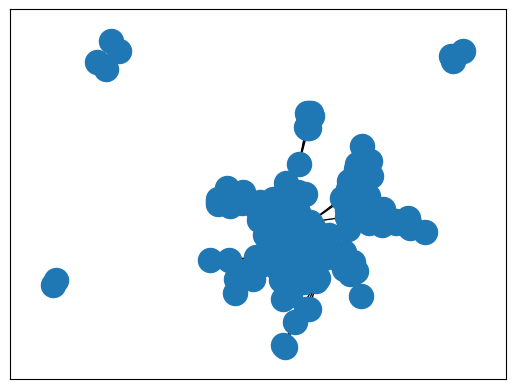

In [ ]:
g = nx.from_edgelist(edges)
pos = nx.spring_layout(g)
nx.draw_networkx(g,  with_labels=False)

In [ ]:
len(g)

333

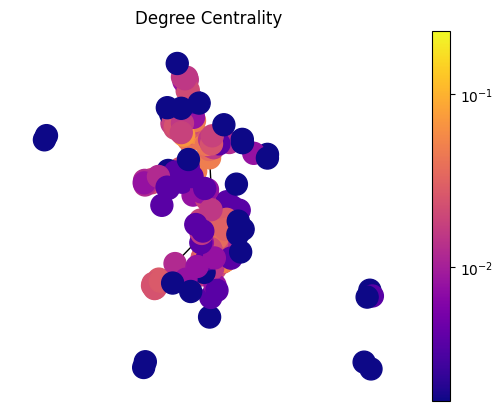

In [ ]:
dc = nx.degree_centrality(g)
draw(g, pos, dc, 'Degree Centrality')

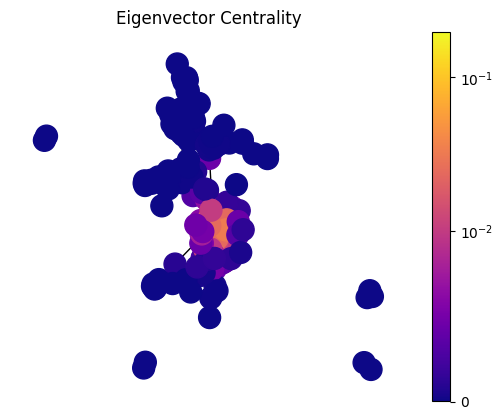

In [ ]:
ec = nx.eigenvector_centrality(g)
draw(g, pos, ec, 'Eigenvector Centrality')

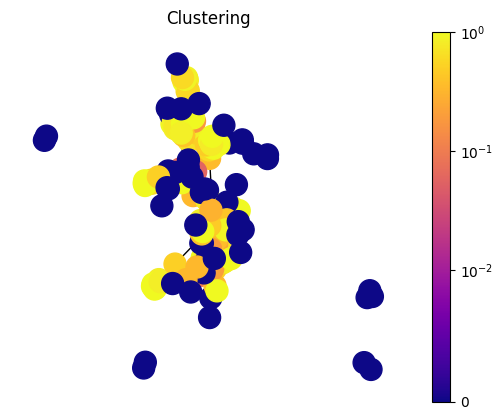

In [ ]:
clustering = nx.clustering(g)
draw(g, pos, clustering, 'Clustering')

In [ ]:
nx.average_clustering(g)

0.5082445417696639

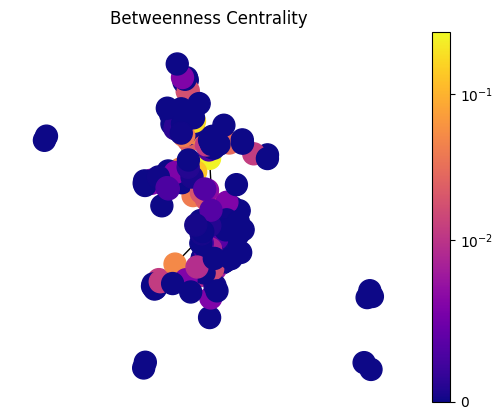

In [ ]:
bc = nx.betweenness_centrality(g)
draw(g, pos, bc, 'Betweenness Centrality')

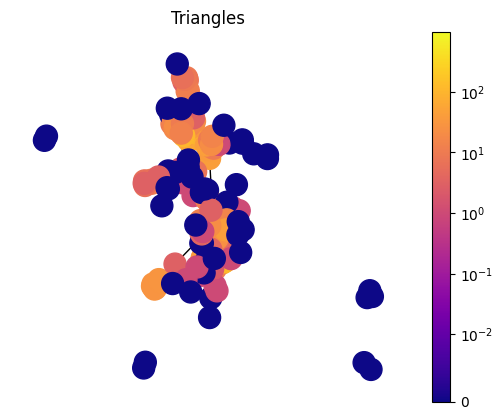

In [ ]:
tr = nx.triangles(g)
draw(g, pos, tr, 'Triangles')